In [39]:
# import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import svm
from datetime import datetime
from datetime import date
from sklearn import datasets
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #repeatly split the train and test data
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [40]:
#load dataset 

Market_df = pd.read_excel('D:/Mahdieh_CourseUniversity/University_courses/ALY6020/Module_3/Project/marketing_campaign.xlsx')
Market_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [41]:
Market_df.shape

(2240, 29)

In [42]:
Market_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [43]:
Market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [44]:
# check for missing value

Market_df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [45]:
Market_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<AxesSubplot: >

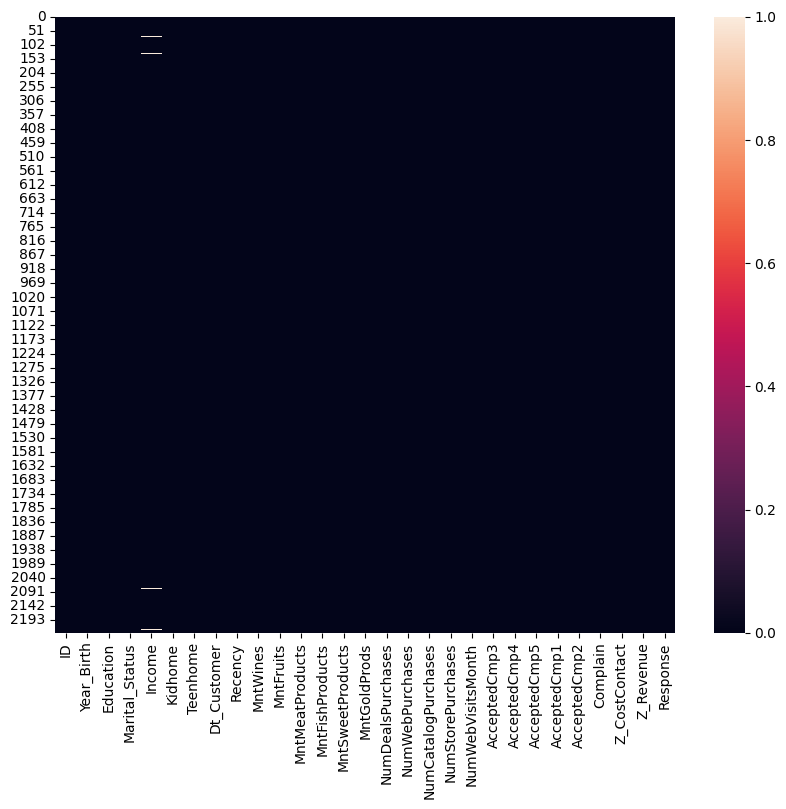

In [46]:
plt.figure(figsize=(10,8))

sns.heatmap(Market_df.isnull()) # we have missing values in income

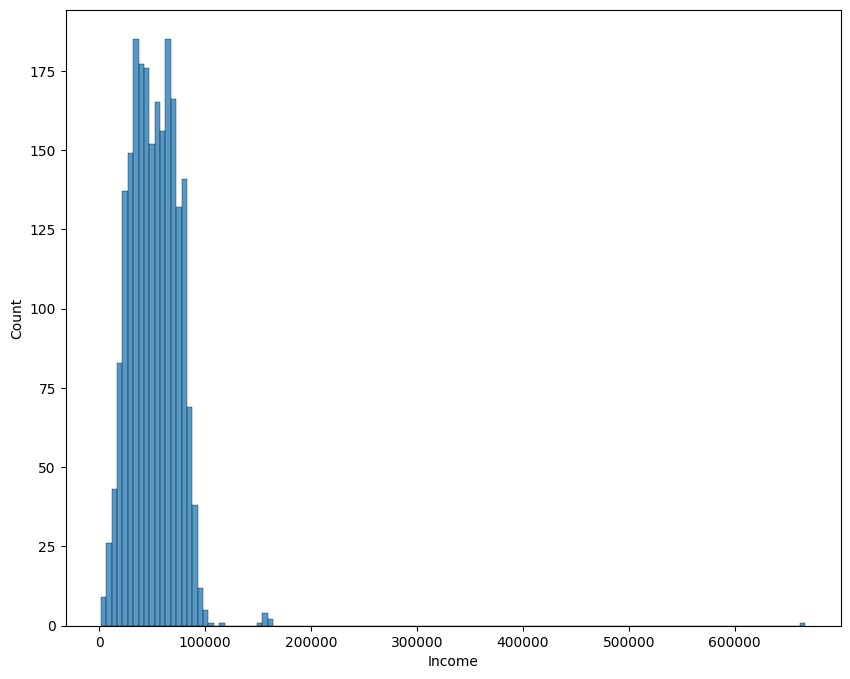

In [47]:
# check distribution of income

sns.histplot(Market_df.Income)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [48]:
# since income is skewed, I fill missing value with median 

Market_df['Income']= Market_df['Income'].fillna(Market_df['Income'].median())

In [49]:
Market_df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [50]:
#check for duplicated

Market_df.duplicated().sum()

0

<AxesSubplot: >

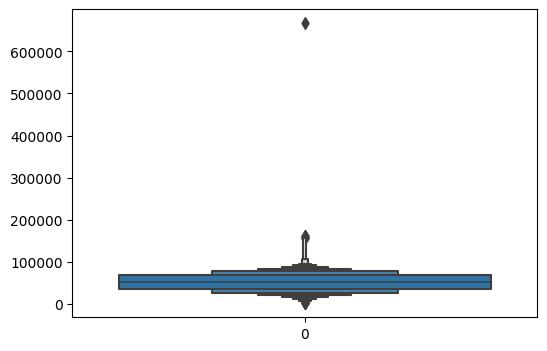

In [51]:
#check for outliers

plt.figure(figsize=(6,4))
sns.boxenplot(Market_df.Income)

In [52]:
# define function to convert Year_Birth to age
  
def calculateAge(birthYear):
    today = date.today()
    age = today.year - birthYear
 
    return age


#create Age column and apply function to convert Year_Birth to Age

Market_df['Age'] = calculateAge(Market_df['Year_Birth'])

In [53]:
#drop Year_Birth

Market_df.drop(['Year_Birth'], axis= 1 , inplace= True)

In [54]:
# convert date to days

#convert columns to datetime

Market_df['Dt_Customer'] = pd.to_datetime(Market_df['Dt_Customer'], errors='coerce' )
current_date = date.today()
date_1=pd.to_datetime(current_date)


#calculate difference between dates

Market_df['subscription_duration'] = ((date_1)-(Market_df['Dt_Customer'])) / np.timedelta64(1, 'D')

In [55]:
#drop Dt_Customer,ID

Market_df.drop(['Dt_Customer'], axis= 1 , inplace= True)
Market_df.drop(['ID'], axis= 1 , inplace= True)

In [56]:
Market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2240 non-null   object 
 1   Marital_Status         2240 non-null   object 
 2   Income                 2240 non-null   float64
 3   Kidhome                2240 non-null   int64  
 4   Teenhome               2240 non-null   int64  
 5   Recency                2240 non-null   int64  
 6   MntWines               2240 non-null   int64  
 7   MntFruits              2240 non-null   int64  
 8   MntMeatProducts        2240 non-null   int64  
 9   MntFishProducts        2240 non-null   int64  
 10  MntSweetProducts       2240 non-null   int64  
 11  MntGoldProds           2240 non-null   int64  
 12  NumDealsPurchases      2240 non-null   int64  
 13  NumWebPurchases        2240 non-null   int64  
 14  NumCatalogPurchases    2240 non-null   int64  
 15  NumS

In [57]:
#Summarizing Categori from Marital_Status
Market_df['Marital_Status'] = Market_df['Marital_Status'].replace(['Widow','Divorced','Alone'],'Single')
Market_df['Marital_Status'] = Market_df['Marital_Status'].replace(['Married'],'Together')
Market_df['Marital_Status'] = Market_df['Marital_Status'].replace(['Absurd','YOLO'],'Other')

In [58]:
Market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2240 non-null   object 
 1   Marital_Status         2240 non-null   object 
 2   Income                 2240 non-null   float64
 3   Kidhome                2240 non-null   int64  
 4   Teenhome               2240 non-null   int64  
 5   Recency                2240 non-null   int64  
 6   MntWines               2240 non-null   int64  
 7   MntFruits              2240 non-null   int64  
 8   MntMeatProducts        2240 non-null   int64  
 9   MntFishProducts        2240 non-null   int64  
 10  MntSweetProducts       2240 non-null   int64  
 11  MntGoldProds           2240 non-null   int64  
 12  NumDealsPurchases      2240 non-null   int64  
 13  NumWebPurchases        2240 non-null   int64  
 14  NumCatalogPurchases    2240 non-null   int64  
 15  NumS

In [59]:
# change variable to dummy

Market_df = pd.get_dummies(Market_df , columns= ['Education','Marital_Status'])

In [60]:
# Build Logistic Regression
# indicate predictor and predicted variables

y = Market_df['Response']

x = Market_df.drop(['Response'], axis=1)


In [61]:
# split our data into training and testing data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [62]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [63]:
#Perform model

logistic_model=LogisticRegression(solver='liblinear', random_state= 1 )
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

print(logistic_model.score(x_train,y_train)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


89.84375
[[365  12]
 [ 36  35]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       377
           1       0.74      0.49      0.59        71

    accuracy                           0.89       448
   macro avg       0.83      0.73      0.77       448
weighted avg       0.88      0.89      0.88       448



In [64]:
#model = sm.Logit(y_train,x_train).fit()
#print(model.summary())

Text(0.5, 36.72222222222221, 'Predicted Values')

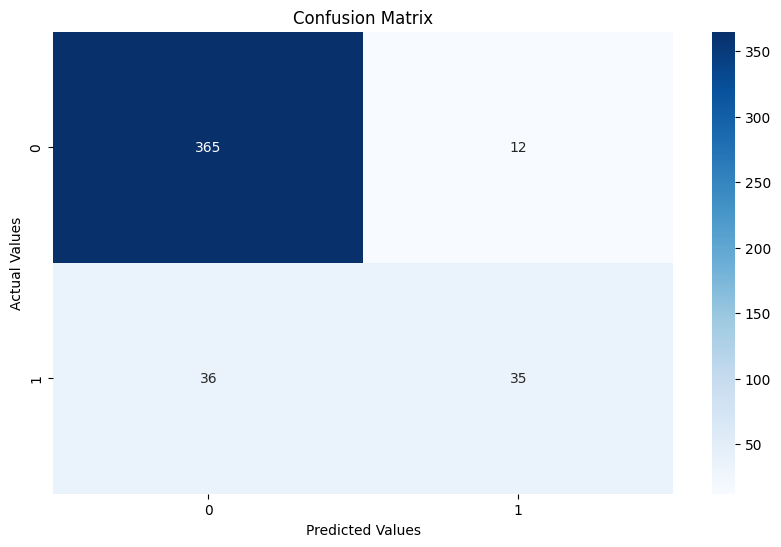

In [65]:
plt.figure(figsize=(10,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [66]:
# build SVM model

from sklearn import svm
svm_model = svm.SVC(kernel='linear')
svm_final = svm_model.fit(x_train,y_train)
print('accuracy' , svm_final.score(x_train,y_train))



accuracy 0.8956473214285714


In [67]:
y_pred = svm_final.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[364  13]
 [ 38  33]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.93       377
           1       0.72      0.46      0.56        71

    accuracy                           0.89       448
   macro avg       0.81      0.72      0.75       448
weighted avg       0.88      0.89      0.88       448



Text(0.5, 36.72222222222221, 'Predicted Values')

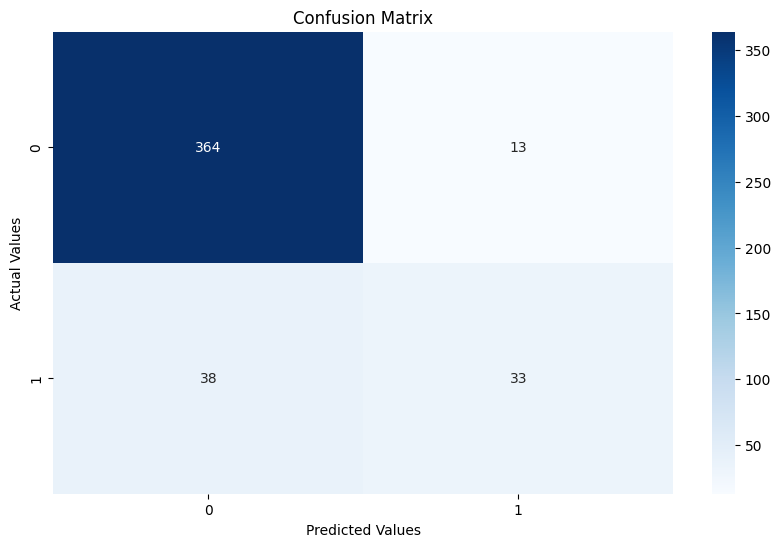

In [68]:
plt.figure(figsize=(10,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [ ]:
# Perform stepwise regression to find significent variables

lreg = LogisticRegression()

sfs1 = sfs(lreg,k_features=33, forward=True, verbose=2, scoring='neg_mean_squared_error')

sfs1 = sfs1.fit(x, y)

feat_names = list(sfs1.k_feature_names_)
print(feat_names)

In [120]:
# Build Logistic Regression
# indicate predictor and predicted variables

x = Market_df[['Recency', 'MntFruits', 'MntMeatProducts','NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Z_CostContact', 'Z_Revenue', 
               'Age','Education_Basic', 'Education_Graduation', 'Education_PhD','Marital_Status_Single', 'Marital_Status_Together','subscription_duration']]


y = Market_df['Response']

# split our data into training and testing data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


#Perform model

logistic_model=LogisticRegression(solver='liblinear', random_state= 1 )
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

print(logistic_model.score(x_train,y_train)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


90.17857142857143
[[367  13]
 [ 41  27]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       380
           1       0.68      0.40      0.50        68

    accuracy                           0.88       448
   macro avg       0.79      0.68      0.72       448
weighted avg       0.87      0.88      0.87       448

